## ISnT Lab 1

#### Про условие:

##### Данные: 

Предоставлены файлы RGB-сигналов от 10 участников. Данные помечены баллами умственной работоспособности за каждую минуту.

##### Задание: 

Работа будет выполнена, как задача классификации с определением порогового значения производительности для категоризации состояний (например, высокая или низкая производительность).

##### Методология:
- Разработка признаков: Используйте необработанные сигналы R, G, B. Предлагается обработать эти сигналы и извлечь значимые признаки (например, статистические, временные, частотные).
- Входные данные модели: Поэкспериментируйте с использованием 1, 2 или всех 3 цветовых каналов вместе, чтобы определить наиболее эффективные входные данные.
- Исследование модели: Изучите широкий спектр методов машинного обучения и глубокого обучения. Цель - провести сравнительный анализ для определения оптимальной модели. 
- Оценка: Accuracy, Precision, Recall, F1-Score и Confusion Matrix.


#### Часть 1

В этой части я изучала необработанные сигналы R, G, B, обрабатывала их и извлекала значимые признаки. 

Колонки t0–t59 - значения сигнала для одного временного ряда, соответствующего одной минуте наблюдения за участником.

Колонка AU - это метка, представляющая балл умственной работоспособности для данной минуты.

Колонка file имеет формат "22-12-28-rings-morning_min0"

В первую очередь я решила визуализировать часть данных для одного испытуемого по всем каналам за 5 минут в разное время дня.

#### Part 1

In this section, I examined the raw R, G, and B signals, processed them, and extracted significant features.

Columns t0–t59 are the signal value for a single time series, corresponding to one minute of observation of a participant.

Column AU is a label representing the mental performance score for a given minute.

Column file has the format "22-12-28-rings-morning_min0"

First, I decided to visualize a portion of the data for one subject across all channels for 5 minutes at different times of the day.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
channels = ['R', 'G', 'B']
colors = ['red', 'green', 'blue']

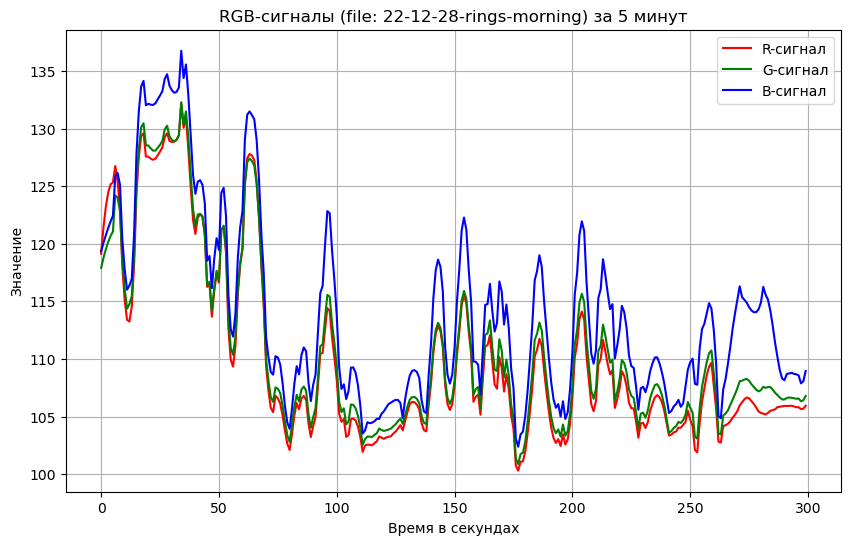

In [112]:
signals = {}
for channel in channels:
    df_rows = pd.read_csv(f'data/{channel}/{channel}_chunks_3.csv')
    channel_signals = []
    for i in range(5):
        rows = df_rows.iloc[i]
        signal = rows[[f't{i}' for i in range(60)]].astype(float).values
        channel_signals.append(signal)
    signals[channel] = np.concatenate(channel_signals)
  
plt.figure(figsize = (10,6))
for i, channel in enumerate(channels):
        plt.plot(range(300), signals[channel], color = colors[i], label = f"{channel}-сигнал")
plt.title(f'RGB-сигналы (file: 22-12-28-rings-morning) за 5 минут')
plt.xlabel('Время в секундах')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

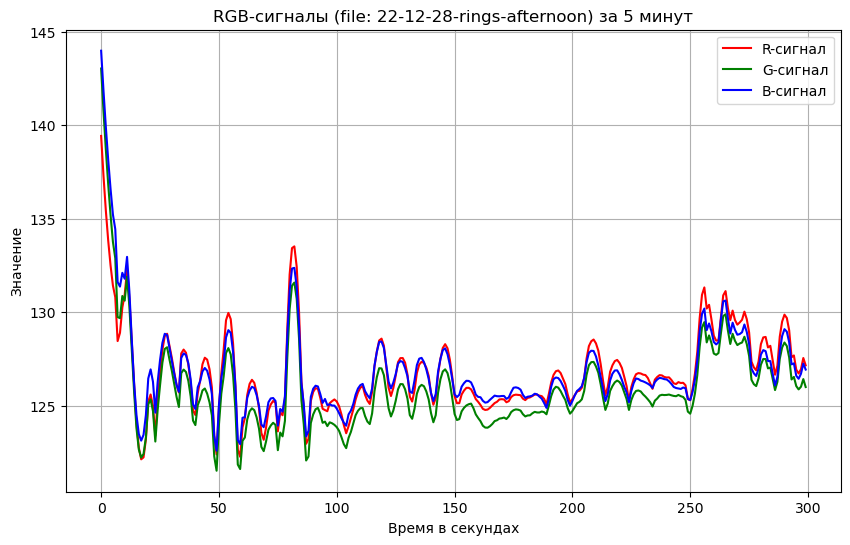

In [113]:
signals = {}
for channel in channels:
    df_rows = pd.read_csv(f'data/{channel}/{channel}_chunks_3.csv')
    channel_signals = []
    for i in range(10, 15):
        rows = df_rows.iloc[i]
        signal = rows[[f't{i}' for i in range(60)]].astype(float).values
        channel_signals.append(signal)
    signals[channel] = np.concatenate(channel_signals)
    
plt.figure(figsize = (10,6))
for i, channel in enumerate(channels):
    plt.plot(range(300), signals[channel], color = colors[i], label = f"{channel}-сигнал")
plt.title(f'RGB-сигналы (file: 22-12-28-rings-afternoon) за 5 минут')
plt.xlabel('Время в секундах')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

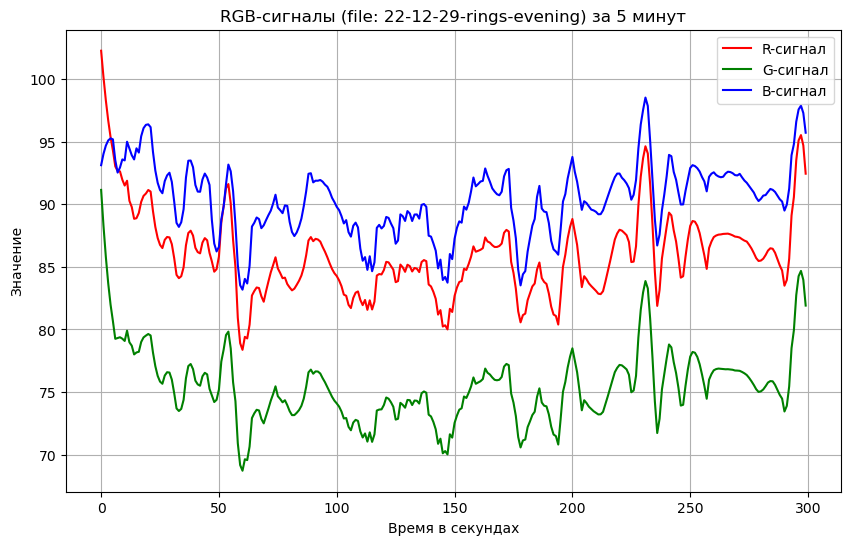

In [114]:
signals = {}
for channel in channels:
    df_rows = pd.read_csv(f'data/{channel}/{channel}_chunks_3.csv')
    channel_signals = []
    for i in range(20, 25):
        rows = df_rows.iloc[i]
        signal = rows[[f't{i}' for i in range(60)]].astype(float).values
        channel_signals.append(signal)
    signals[channel] = np.concatenate(channel_signals)
    
plt.figure(figsize = (10,6))
for i, channel in enumerate(channels):
    plt.plot(range(300), signals[channel], color = colors[i], label = f"{channel}-сигнал")
plt.title(f'RGB-сигналы (file: 22-12-29-rings-evening) за 5 минут')
plt.xlabel('Время в секундах')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

#### Вывод:

На первый взгляд можно предположить, что вечером вектор RGB-сигналов заметно снижается, но стоит учитывать что я рассмотрела только малую часть данных. Также остается вопросом, что значит расстояние между сигналами.

#### Conclusion:

At first glance, it might seem that the RGB signal vector significantly decreases in the evening, but it's important to keep in mind that I only looked at a small portion of the data. The significance of the distance between signals also remains a question.

Также я решила преобразить колонку file, которая имеет формат "22-12-28-rings-morning_min0", и разделить её на колонки data, time_of_day, minute. 

I also decided to transform the file column, which has the format "22-12-28-rings-morning_min0", and split it into columns data, time_of_day, minute.

In [115]:
from datetime import datetime

In [116]:
def parse_file_column(file_name):
    parts = file_name.split('-')
    date = datetime.strptime('-'.join(parts[:3]), '%y-%m-%d').strftime('%Y-%m-%d')
    time_of_day = parts[4].split('_')[0]
    minute = parts[-1].split('_min')[1]
    return pd.Series([date, time_of_day, minute], index=['date', 'time_of_day', 'minute'])
    

In [117]:
for channel in channels:
    for i in range(3, 13):
        df = pd.read_csv(f'data/{channel}/{channel}_chunks_{i}.csv')
        
        df[['date', 'time_of_day', 'minute']] = df['file']. apply(parse_file_column)
        df.to_csv(f'data/{channel}/{channel}_chunks_{i}.csv', index=False)

In [118]:
df_ex1 = pd.read_csv(f'data/R/R_chunks_11.csv')
df_ex1.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t55,t56,t57,t58,t59,file,AU,date,time_of_day,minute
0,113.280690,112.082785,111.223699,110.703433,110.521986,110.679359,111.688651,113.096939,113.717962,115.193352,...,114.396607,114.122576,115.670509,118.272050,121.504776,23-04-07-rings-afternoon-sync_min0,0.104792,2023-04-07,afternoon,0
1,123.202471,123.887735,123.531528,122.043451,119.467565,117.292464,115.365234,114.945735,114.356747,115.164173,...,123.206762,122.918338,123.557305,121.687004,120.990069,23-04-07-rings-afternoon-sync_min1,0.104792,2023-04-07,afternoon,1
2,119.542427,118.326208,117.639985,118.712301,120.453969,122.653675,123.611722,124.720850,124.610383,125.256992,...,119.749711,120.016728,120.512956,120.396411,120.075960,23-04-07-rings-afternoon-sync_min2,0.104792,2023-04-07,afternoon,2
3,119.469412,118.949356,118.217176,118.249439,119.720757,121.462837,122.501059,123.042387,122.884436,122.323021,...,124.011315,125.469064,125.790309,126.166048,124.425635,23-04-07-rings-afternoon-sync_min3,0.104792,2023-04-07,afternoon,3
4,123.334139,123.246893,121.898296,121.551994,121.929081,121.056371,121.947761,122.485577,122.659617,122.741285,...,123.298719,121.986576,122.640043,122.791841,123.869959,23-04-07-rings-afternoon-sync_min4,0.104792,2023-04-07,afternoon,4


In [119]:
df_ex2 = pd.read_csv(f'data/R/R_chunks_3.csv')
df_ex2.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t55,t56,t57,t58,t59,file,AU,date,time_of_day,minute
0,119.131800,121.437749,123.209932,124.448347,125.152994,125.323875,126.745760,125.399171,123.102916,117.998198,...,109.928002,109.335346,111.146521,115.565696,118.111040,22-12-28-rings-morning_min0,0.65627,2022-12-28,morning,0
1,119.600725,125.297909,127.424121,127.789504,127.653522,127.243316,125.440439,122.305127,118.096135,114.581745,...,102.503347,102.673795,102.856640,103.271630,103.175779,22-12-28-rings-morning_min1,0.65627,2022-12-28,morning,1
2,103.069309,103.186038,103.249039,103.294063,103.519991,103.704832,103.963874,104.252553,103.809210,104.599483,...,103.915514,100.730030,100.297596,101.075304,101.114989,22-12-28-rings-morning_min2,0.65627,2022-12-28,morning,2
3,101.953036,103.541071,105.427598,107.541972,110.230978,110.796526,111.751093,111.119364,108.949335,107.127090,...,106.663324,106.863358,106.666308,106.247178,105.486854,22-12-28-rings-morning_min3,0.65627,2022-12-28,morning,3
4,104.430987,103.346047,103.435047,103.620280,103.700566,104.033217,104.033550,104.276859,104.522086,105.517544,...,105.814010,105.803257,105.643069,105.676224,105.934844,22-12-28-rings-morning_min4,0.65627,2022-12-28,morning,4


Здесь я обрабатывала сигналы и извлекала значимые признаки (статистические, временные, частотные и т.д.).

Для начала я решила создать общий csv файл, который соберет в себе все содержимое директорий R, G и B. После этого я проверила данные, а также извлекла статистические, частотные и временные признаки для каждого ряда.

Here, I processed the signals and extracted significant features (statistical, temporal, frequency, etc.).

To begin, I decided to create a single CSV file that would contain all the contents of the R, G, and B directories. After that, I inspected the data and extracted statistical, frequency, and temporal features for each series.

In [158]:
from scipy import stats
from scipy.fft import fft
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
def create_combined_csv(output_file):
    all_dfs = []
    
    for channel in channels:
        for i in range(3, 13):
            file_path = f'data/{channel}/{channel}_chunks_{i}.csv'
            try:
                df = pd.read_csv(file_path)
                df['channel'] = channel
                df['participant_id'] = i
                
                all_dfs.append(df)
                print(f"Файл {file_path} обработан и добавлен в {output_file}")
            except Exception as e:
                print(f"Ошибка - {file_path}: {e}")
    
    combined_df = pd.concat(all_dfs, ignore_index=True)
    combined_df.to_csv(output_file, index=False)
    print(f"Файл {output_file} создан!")

In [160]:
output_file = 'combined_data.csv'
create_combined_csv(output_file)

Файл data/R/R_chunks_3.csv обработан и добавлен в combined_data.csv
Файл data/R/R_chunks_4.csv обработан и добавлен в combined_data.csv
Файл data/R/R_chunks_5.csv обработан и добавлен в combined_data.csv
Файл data/R/R_chunks_6.csv обработан и добавлен в combined_data.csv
Файл data/R/R_chunks_7.csv обработан и добавлен в combined_data.csv
Файл data/R/R_chunks_8.csv обработан и добавлен в combined_data.csv
Файл data/R/R_chunks_9.csv обработан и добавлен в combined_data.csv
Файл data/R/R_chunks_10.csv обработан и добавлен в combined_data.csv
Файл data/R/R_chunks_11.csv обработан и добавлен в combined_data.csv
Файл data/R/R_chunks_12.csv обработан и добавлен в combined_data.csv
Файл data/G/G_chunks_3.csv обработан и добавлен в combined_data.csv
Файл data/G/G_chunks_4.csv обработан и добавлен в combined_data.csv
Файл data/G/G_chunks_5.csv обработан и добавлен в combined_data.csv
Файл data/G/G_chunks_6.csv обработан и добавлен в combined_data.csv
Файл data/G/G_chunks_7.csv обработан и добавл

In [161]:
df = pd.read_csv(f'combined_data.csv')
df.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t57,t58,t59,file,AU,date,time_of_day,minute,channel,participant_id
0,119.131800,121.437749,123.209932,124.448347,125.152994,125.323875,126.745760,125.399171,123.102916,117.998198,...,111.146521,115.565696,118.111040,22-12-28-rings-morning_min0,0.65627,2022-12-28,morning,0,R,3
1,119.600725,125.297909,127.424121,127.789504,127.653522,127.243316,125.440439,122.305127,118.096135,114.581745,...,102.856640,103.271630,103.175779,22-12-28-rings-morning_min1,0.65627,2022-12-28,morning,1,R,3
2,103.069309,103.186038,103.249039,103.294063,103.519991,103.704832,103.963874,104.252553,103.809210,104.599483,...,100.297596,101.075304,101.114989,22-12-28-rings-morning_min2,0.65627,2022-12-28,morning,2,R,3
3,101.953036,103.541071,105.427598,107.541972,110.230978,110.796526,111.751093,111.119364,108.949335,107.127090,...,106.666308,106.247178,105.486854,22-12-28-rings-morning_min3,0.65627,2022-12-28,morning,3,R,3
4,104.430987,103.346047,103.435047,103.620280,103.700566,104.033217,104.033550,104.276859,104.522086,105.517544,...,105.643069,105.676224,105.934844,22-12-28-rings-morning_min4,0.65627,2022-12-28,morning,4,R,3


In [162]:
column_name = df.columns.tolist()
print(column_name)

['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53', 't54', 't55', 't56', 't57', 't58', 't59', 'file', 'AU', 'date', 'time_of_day', 'minute', 'channel', 'participant_id']


In [163]:
df.dtypes

t0                float64
t1                float64
t2                float64
t3                float64
t4                float64
                   ...   
date               object
time_of_day        object
minute              int64
channel            object
participant_id      int64
Length: 67, dtype: object

In [164]:
df.isna().sum()

t0                0
t1                0
t2                0
t3                0
t4                0
                 ..
date              0
time_of_day       0
minute            0
channel           0
participant_id    0
Length: 67, dtype: int64

In [165]:
mean_au = df['AU'].mean(skipna=True)
df['AU'] = df['AU'].fillna(mean_au)
print(df['AU'].isna().sum())

0


In [166]:
df.to_csv('combined_data.csv', index=False)

In [167]:
au_stats_all = {
    'Min': df['AU'].min(),
    'Max': df['AU'].max(),
    'Median': df['AU'].median(),
    'Mean': df['AU'].mean()
    }
print("Общая статистика для AU:")
for stat, value in au_stats_all.items():
    print(f"{stat}: {value:.4f}")

Общая статистика для AU:
Min: -0.4125
Max: 3.1324
Median: 1.7070
Mean: 1.5964


In [168]:
au_stats_morning = df[df['time_of_day'] == 'morning']['AU'].agg(['min', 'max', 'median', 'mean']).to_dict()
print("Статистика для AU утром:")
for stat, value in au_stats_morning.items():
    print(f"{stat.capitalize()}: {value:.4f}")

au_stats_afternoon = df[df['time_of_day'] == 'afternoon']['AU'].agg(['min', 'max', 'median', 'mean']).to_dict()
print("\nСтатистика для AU днем:")
for stat, value in au_stats_afternoon.items():
    print(f"{stat.capitalize()}: {value:.4f}")

au_stats_evening = df[df['time_of_day'] == 'evening']['AU'].agg(['min', 'max', 'median', 'mean']).to_dict()
print("\nСтатистика для AU вечером:")
for stat, value in au_stats_evening.items():
    print(f"{stat.capitalize()}: {value:.4f}")

Статистика для AU утром:
Min: -0.3173
Max: 2.8503
Median: 1.6782
Mean: 1.5376

Статистика для AU днем:
Min: -0.4125
Max: 3.1324
Median: 1.7909
Mean: 1.7053

Статистика для AU вечером:
Min: -0.2966
Max: 2.8719
Median: 1.6530
Mean: 1.5434


In [169]:
def compute_features(input_file, output_file):
    df = pd.read_csv(input_file)
    features_list = []

    for idx, row in df.iterrows():
        signal = row[[f't{i}' for i in range(60)]].astype(float).values
        signal_centered = signal - np.mean(signal)
        features = {
            'channel': row['channel'],
            'participant_id': row['participant_id'],
            'time_of_day': row['time_of_day'],
            'minute': row['minute'],
            'AU': row['AU'],
            
            # статистические признаки:
            'mean': float(np.mean(signal)),
            'median': float(np.median(signal)),
            'std': float(np.std(signal)),
            'min': float(np.min(signal)),
            'max': float(np.max(signal)),
            'range': float(np.ptp(signal)),
            'rms': float(np.sqrt(np.mean(signal**2))),
            'variance': float(np.var(signal)),
            'cv': float(np.std(signal) / (np.mean(signal) + 1e-8)),
            
            # временные признаки:
            'trend_slope': float(stats.linregress(range(len(signal)), signal)[0]),
            'trend_r2': float(stats.linregress(range(len(signal)), signal)[2]**2),
            'autocorr_lag1': float(np.corrcoef(signal[:-1], signal[1:])[0, 1]),
            
            # частотные признаки:
            'fft_mean': float(np.mean(np.abs(fft(signal_centered)))),
            'fft_max': float(np.max(np.abs(fft(signal_centered)))),
            'dominant_freq': float(np.argmax(np.abs(fft(signal_centered)))),
        }
        features_list.append(features)
        
    features_df = pd.DataFrame(features_list)
    features_df.to_csv(output_file, index=False)
    print(f"Статистические, временные и частотные данные сохранены в {output_file} (размер: {features_df.shape})")

In [170]:
input_file = 'combined_data.csv'
output_file = 'features.csv'
compute_features(input_file, output_file)

Статистические, временные и частотные данные сохранены в features.csv (размер: (3180, 20))


#### Статистические признаки описывают основные характеристики сигнала, такие как центральная тенденция, разброс и форма распределения.

mean - среднее арифметическое значение сигнала, указывает на базовый уровень интенсивности сигнала.

median - медиана, центральное значение отсортированного набора, устойчивый показатель центральной тенденции, менее чувствительный к выбросам.

std - стандартное отклонение, мера разброса относительно среднего, высокое значение указывает на большую вариабельность.

min и max - минимальное и максимальное значение.

range - размах, разница между максимумом и минимумом, общая амплитуда колебаний.

rms - среднеквадратичное значение, "усреднённая амплитуда" с учётом квадратов, оценивает общую "силу" сигнала.

variance - дисперсия, мера разброса в квадратах отклонений, усиливает влияние больших отклонений.

cv - коэффициент вариации, отношение стандартного отклонения к среднему, позволяет сравнивать стабильность сигнала между каналами (R, G, B) или участниками.
#
#### Временные признаки анализируют динамику сигнала во времени, что важно для выявления трендов и зависимостей.

trend_slope - наклон линейного тренда, вычисленный через линейную регрессию, положительное значение - восходящий тренд, отрицательное - нисходящий, может показать изменение интенсивности сигнала.

trend_r2 - коэффициент детерминации линейной регрессии, от 0 до 1, близкое к 1 — сильная линейная зависимость, оценивает, насколько тренд объясняет вариации сигнала.

autocorr_lag1 - автокорреляция первого лага, корреляция между соседними значениями, от -1 до 1, близкое к 1 - сильная положительная зависимость, указывает на ритмичность в сигнале.
#
#### Частотные признаки анализируют спектральные характеристики сигнала, что важно для выявления периодических компонентов.

fft_mean - среднее значение амплитудного спектра после FFT, оценивает общую интенсивность спектра, может указывать на среднюю энергию частот. Высокое значение указывает на сильные колебания в сигнале, низкое — на его стабильность или отсутствие выраженных частот.

fft_max - максимальная амплитуда в спектре, пиковая частотная энергия, указывает на самую сильную частоту, если она выделяется.

dominant_freq - индекс максимальной амплитуды в спектре, интерпретируемый как доминирующая частота, индекс пика в частотной области, может указать на частоту пульса или других периодических компонентов.

In [171]:
df = pd.read_csv('features.csv')

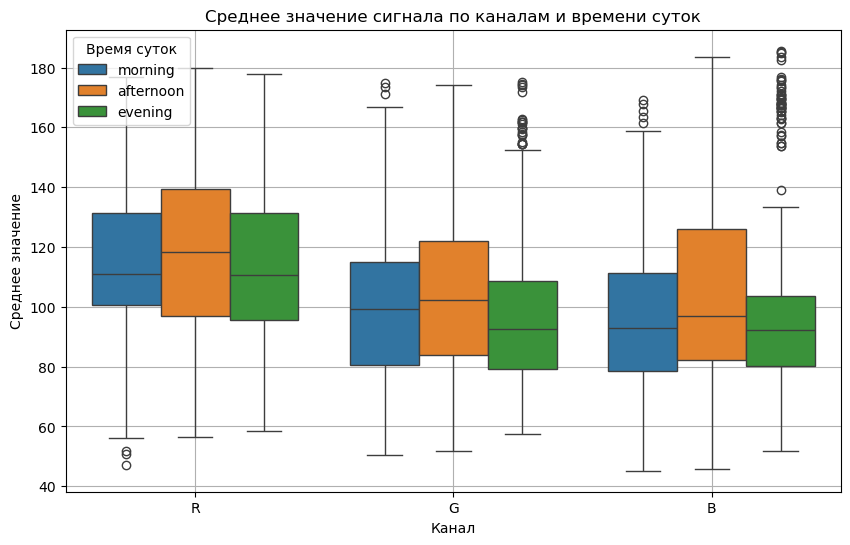

In [172]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='channel', y='mean', hue='time_of_day', data=df)
plt.title('Среднее значение сигнала по каналам и времени суток')
plt.xlabel('Канал')
plt.ylabel('Среднее значение')
plt.legend(title='Время суток')
plt.grid(True)
plt.show()

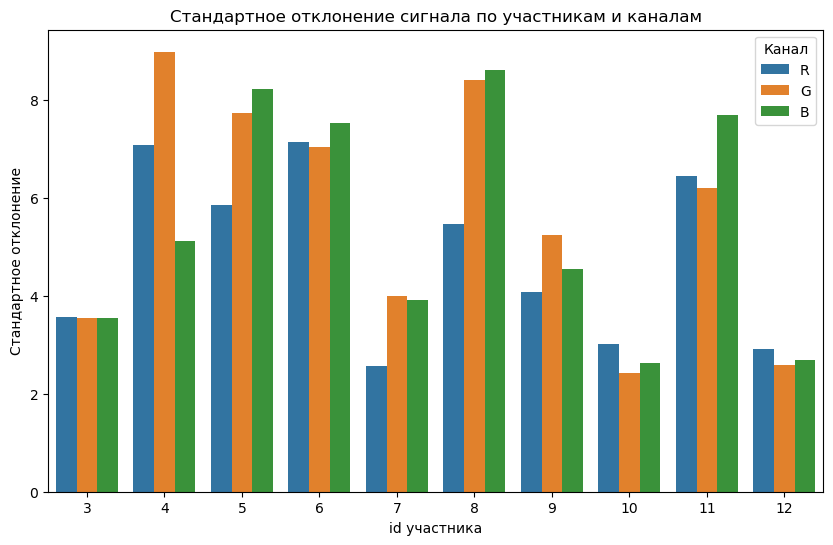

In [173]:
plt.figure(figsize=(10, 6))
sns.barplot(x='participant_id', y='std', hue='channel', data=df, errorbar=None)
plt.title('Стандартное отклонение сигнала по участникам и каналам')
plt.xlabel('id участника')
plt.ylabel('Стандартное отклонение')
plt.legend(title='Канал')
plt.show()

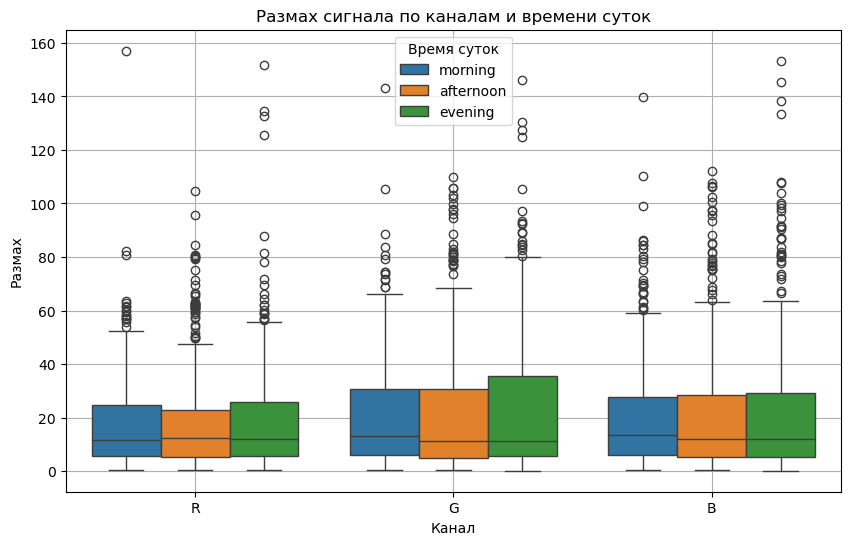

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='channel', y='range', hue='time_of_day', data=df)
plt.title('Размах сигнала по каналам и времени суток')
plt.xlabel('Канал')
plt.ylabel('Размах')
plt.legend(title='Время суток')
plt.grid(True)
plt.show()

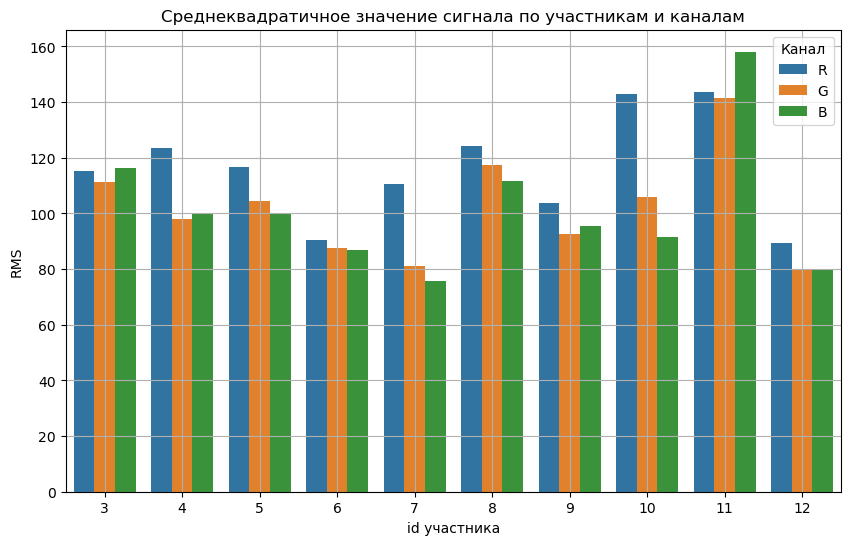

In [175]:
plt.figure(figsize=(10, 6))
sns.barplot(x='participant_id', y='rms', hue='channel', data=df, errorbar=None)
plt.title('Среднеквадратичное значение сигнала по участникам и каналам')
plt.xlabel('id участника')
plt.ylabel('RMS')
plt.legend(title='Канал')
plt.grid(True)
plt.show()

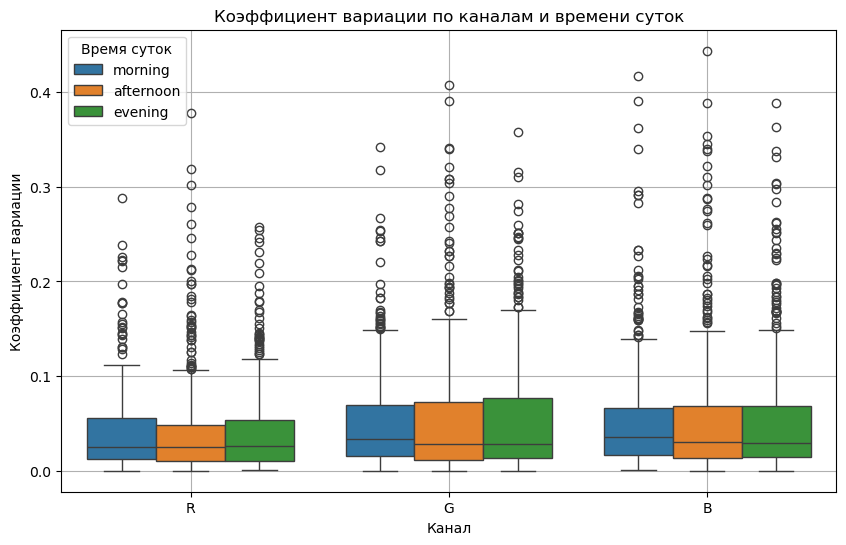

In [176]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='channel', y='cv', hue='time_of_day', data=df)
plt.title('Коэффициент вариации по каналам и времени суток')
plt.xlabel('Канал')
plt.ylabel('Коэффициент вариации')
plt.legend(title='Время суток')
plt.grid(True)
plt.show()

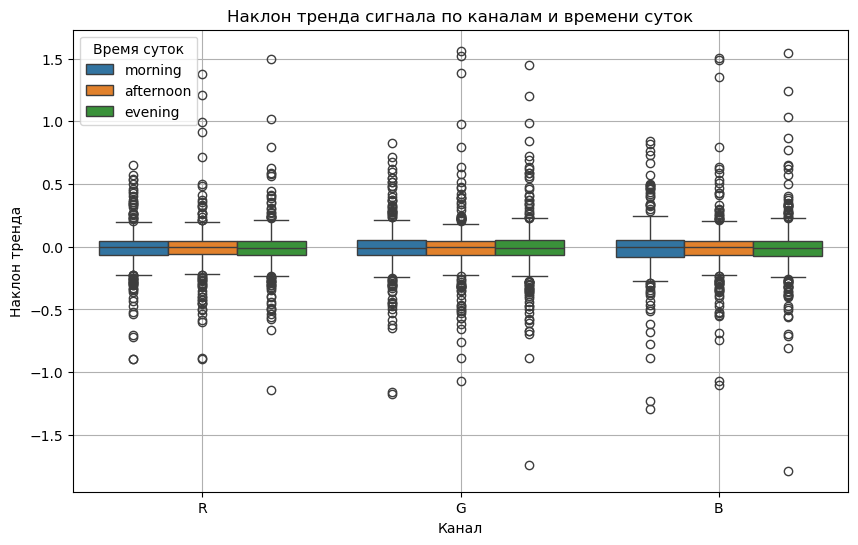

In [177]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='channel', y='trend_slope', hue='time_of_day', data=df)
plt.title('Наклон тренда сигнала по каналам и времени суток')
plt.xlabel('Канал')
plt.ylabel('Наклон тренда')
plt.legend(title='Время суток')
plt.grid(True)
plt.show()

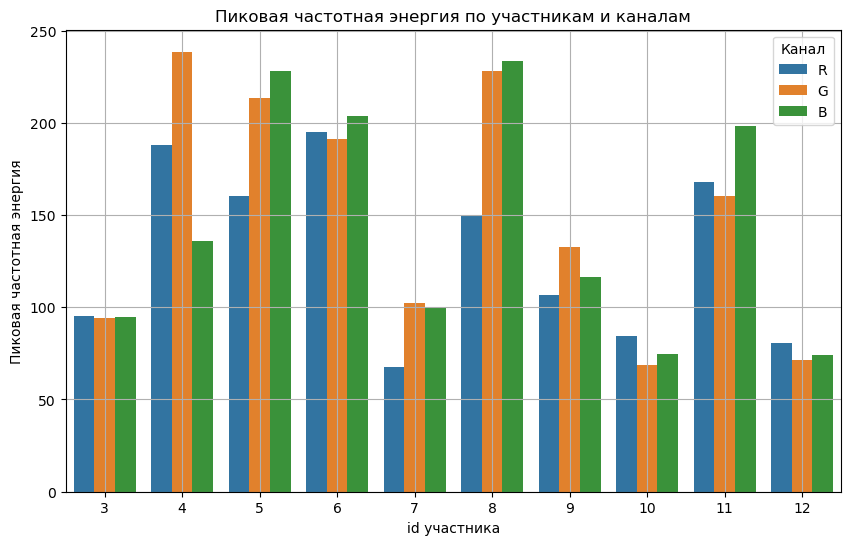

In [178]:
plt.figure(figsize=(10, 6))
sns.barplot(x='participant_id', y='fft_max', hue='channel', data=df, errorbar=None)
plt.title('Пиковая частотная энергия по участникам и каналам')
plt.xlabel('id участника')
plt.ylabel('Пиковая частотная энергия')
plt.legend(title='Канал')
plt.grid(True)
plt.show()

#### Часть 2

В этой части я экспериментировала с использованием 1, 2 иои всех 3 цветовых каналов вместе, чтобы определить наиболее эффективные входные данные для разных моделей. Также провела исследование, по результатам которого определила оптимальную модель. Оценку производила для каждой модели с помощью Accuracy, Precision, Recall, F1-Score и Confusion Matrix.

#### Part 2

In this part, I experimented with using 1, 2, and all 3 color channels together to determine the most effective input data for different models. I also conducted a study, which led to the optimal model. I evaluated each model using Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [181]:
channels_1 = ['R', 'G', 'B']
channels_2 = [('R', 'G'), ('R', 'B'), ('G', 'B')]

Метод comb_channels готовит данные для экспериментов работая с features.csv. Он устанавливает порог классификации по перцентилю AU и создаёт наборы x и y для всевозможных комбинаций каналов.

The comb_channels method prepares data for experiments using features.csv. It sets the classification threshold based on the AU percentile and creates x and y sets for all possible channel combinations.

In [199]:
def comb_channels(threshold_percentile):
    features_df = pd.read_csv('features.csv')
    
    threshold = np.percentile(features_df['AU'], threshold_percentile)
    
    features_columns = [col for col in features_df.columns if col not in ['channel', 'participant_id', 'minute', 'AU', 'time_of_day']]
    
    x_channels = {}
    y_channels = {}
    
    for channel in channels_1:
        rows = features_df['channel'] == channel
        
        x = features_df.loc[rows, features_columns]
        y = (features_df.loc[rows, 'AU'] > threshold).astype(int)
        x_channels[channel] = x
        y_channels[channel] = y
        
        print(f'Канал {channel}, объем данных {x.shape[0]}')
    
    for channel_1, channel_2 in channels_2:
        rows = features_df['channel'].isin([channel_1, channel_2])
        
        x = features_df.loc[rows, features_columns]
        y = (features_df.loc[rows, 'AU'] > threshold).astype(int)
        
        x_channels[f'{channel_1}{channel_2}'] = x
        y_channels[f'{channel_1}{channel_2}'] = y
        print(f'Каналы {channel_1}{channel_2}, объем данных {x.shape[0]}')
       
    x_all = features_df[features_columns] 
    y_all = (features_df['AU'] > threshold).astype(int)
    
    x_channels['RGB'] = x_all
    y_channels['RGB'] = y_all
    print(f'Каналы RGB, объем данных {x_all.shape[0]}')
    
    for channel in x_channels:
        x_channels[channel] = x_channels[channel].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    return x_channels, y_channels

In [200]:
threshold_percentile = 50
x_channels, y_channels = comb_channels(threshold_percentile)

Канал R, объем данных 1060
Канал G, объем данных 1060
Канал B, объем данных 1060
Каналы RG, объем данных 2120
Каналы RB, объем данных 2120
Каналы GB, объем данных 2120
Каналы RGB, объем данных 3180


#### Модели

1. Random Forest Classifier
2. Logistic Regression
3. Support Vector Classifier с линейным ядром
4. Support Vector Classifier с ядром RBF
5. MLPClassifier
6. GaussianNB 

In [201]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'SupportVectorClassifier_LinearKernel': SVC(kernel='linear', random_state=42, class_weight='balanced', probability=True),
    'SupportVectorClassifier_RBF': SVC(kernel='rbf', random_state=42, class_weight='balanced', probability=True),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, early_stopping=True),
    'GaussianNB': GaussianNB(),
}

После выбора моделей, которые подходят для нашей задачи, я разделила денные на train и test выборки, обучила на них модели и получила результаты оценок. Более подробно о результатах будет рассказано ниже.

After selecting models suitable for our task, I split the data into train and test sets, trained the models on them, and obtained evaluation results. The results will be discussed in more detail below.

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [204]:
results = {}

for channel in x_channels:
    X = x_channels[channel]
    y = y_channels[channel]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    scaler = StandardScaler()
    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)
    
    results[channel] = {}
    
    for model_name, model in models.items():
        model.fit(X_train_scaler, y_train)
        y_pred = model.predict(X_test_scaler)
        
        results[channel][model_name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, zero_division=0),
            'recall': recall_score(y_test, y_pred, zero_division=0),
            'f1_score': f1_score(y_test, y_pred, zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

Посмотрим на результаты:

Let's look at the results:

In [213]:
all_results = []
for channel, model_results in results.items():
    for model_name, metrics in model_results.items():
        all_results.append({
            'Канал': channel,
            'Модель': model_name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1_score']
        })

results_df = pd.DataFrame(all_results)
results_df_sorted = results_df.sort_values('F1-Score', ascending=False)

In [214]:
results_df_sorted

,Канал,Модель,Accuracy,Precision,Recall,F1-Score
16,B,MLPClassifier,0.641509,0.597315,0.847619,0.700787
30,GB,RandomForest,0.674528,0.665138,0.690476,0.677570
33,GB,SupportVectorClassifier_RBF,0.629717,0.598513,0.766667,0.672234
15,B,SupportVectorClassifier_RBF,0.613208,0.579310,0.800000,0.672000
12,B,RandomForest,0.632075,0.603053,0.752381,0.669492
36,RGB,RandomForest,0.663522,0.656442,0.677215,0.666667
17,B,GaussianNB,0.566038,0.540373,0.828571,0.654135
18,RG,RandomForest,0.643868,0.633484,0.666667,0.649652
24,RB,RandomForest,0.627358,0.613043,0.671429,0.640909
14,B,SupportVectorClassifier_LinearKernel,0.580189,0.556338,0.752381,0.639676


In [216]:
best_result = results_df_sorted.iloc[0]
print(f"Лучшая модель: {best_result['Модель']} для {best_result['Канал']} с F1-Score {best_result['F1-Score']:.4f}")

Лучшая модель: MLPClassifier для B с F1-Score 0.7008


In [218]:
print("Сравнение по каналам по F1-Score:")
channel_comparison = results_df.groupby('Канал')['F1-Score'].agg(['mean', 'max', 'std']).sort_values('mean', ascending=False)
print(channel_comparison.round(4))

Сравнение по каналам по F1-Score:
         mean     max     std
Канал                        
B      0.6437  0.7008  0.0610
RGB    0.6229  0.6667  0.0264
GB     0.6197  0.6776  0.0570
RG     0.5864  0.6497  0.0484
G      0.5774  0.6328  0.0757
RB     0.5761  0.6409  0.0414
R      0.5564  0.6071  0.0449


In [220]:
print("Сравнение по моделям по F1-Score:")
model_comparison = results_df.groupby('Модель')['F1-Score'].agg(['mean', 'max', 'std']).sort_values('mean', ascending=False)
print(model_comparison.round(4))

Сравнение по моделям по F1-Score:
                                        mean     max     std
Модель                                                      
RandomForest                          0.6446  0.6776  0.0317
SupportVectorClassifier_RBF           0.6212  0.6722  0.0465
GaussianNB                            0.6147  0.6541  0.0235
MLPClassifier                         0.5910  0.7008  0.0721
SupportVectorClassifier_LinearKernel  0.5888  0.6397  0.0427
LogisticRegression                    0.5248  0.5862  0.0392


В ходе данной работы можно с точностью сказать, что лучше всего в общем случае себя показала модель Random Forest, при этом данные, взятые только из канала B дали самую высокую среднюю оценку по F1-Score.

В подтверждение данного вывода визуализируем наши результаты:

Based on this study, we can confidently conclude that the Random Forest model performed best overall, with data taken solely from channel B yielding the highest average F1-Score.

To support this conclusion, we visualize our results:

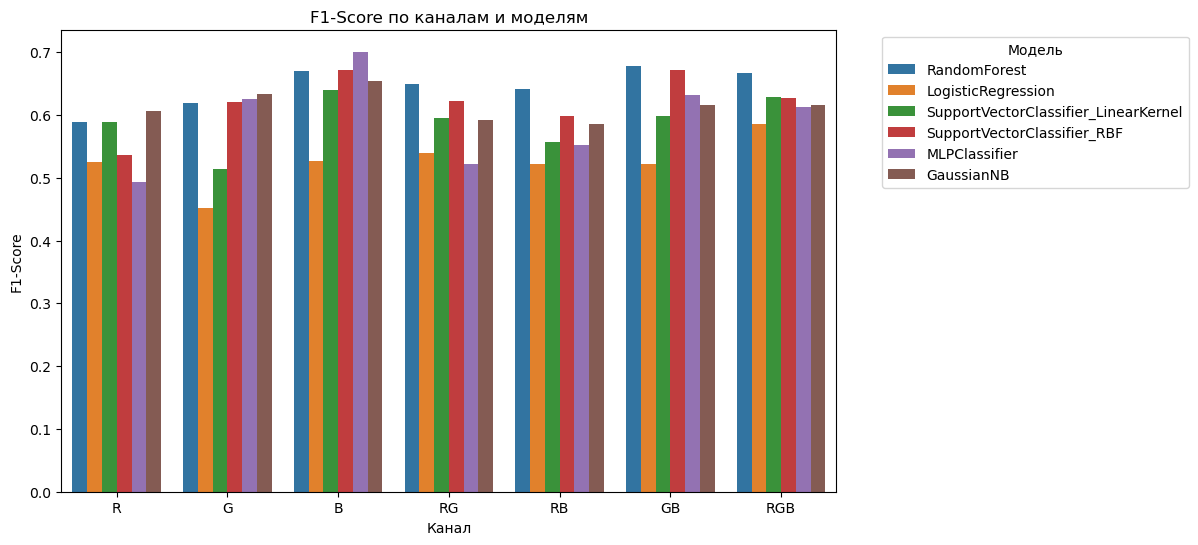

In [225]:
plt.figure(figsize=(10,6))
sns.barplot(x='Канал', y='F1-Score', hue='Модель', data=results_df)
plt.title('F1-Score по каналам и моделям')
plt.legend(title='Модель', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

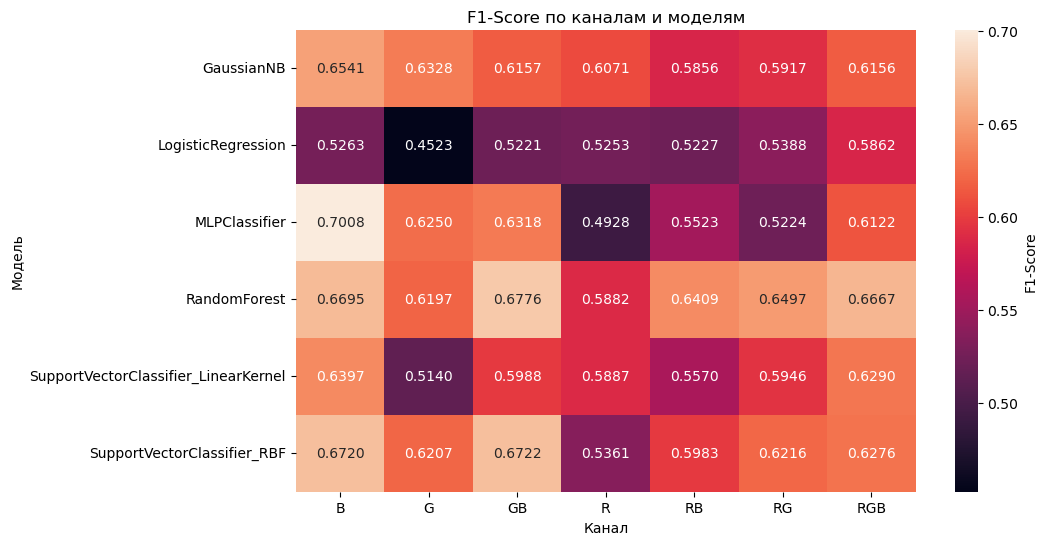

In [229]:
plt.figure(figsize=(10, 6))
res_df = results_df.pivot(index='Модель', columns='Канал', values='F1-Score')
sns.heatmap(res_df, annot=True, fmt='.4f', cbar_kws={'label': 'F1-Score'})
plt.title('F1-Score по каналам и моделям')
plt.xlabel('Канал')
plt.ylabel('Модель')
plt.show()